Before you turn this lab in, make sure everything runs as expected. **Restart and run all cells** (in the menubar, select Kernel$\rightarrow$Restart & Run All) then check the output is as expected and there are no errors.  Also remember to **Save** before uploading this file (File$\rightarrow$Save and Checkpoint).

---

# <div align="center">Quantum Computer Systems Design</div>&nbsp;  <div align="center">Lab 2</div> 

### 1. Quantum Measurements
How do we read out information from a quantum computer? In this problem, we will work with the different ways you may measure quantum states. 

#### 1.1 Measuring single-qubit states
Consider the following quantum program that prepares a quantum state and then performs a measurement.

In [2]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer, plot_bloch_multivector
from qiskit.quantum_info import state_fidelity, Operator
from qiskit import BasicAer
# Use the simulator from qiskit Aer
backend = BasicAer.get_backend('qasm_simulator')

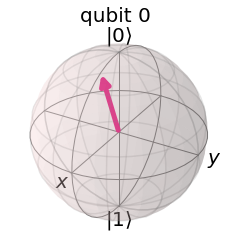

In [3]:
def draw_bloch(qc):
    state_simulator = BasicAer.get_backend('statevector_simulator')
    result = execute(qc, state_simulator).result()
    return plot_bloch_multivector(result.get_statevector(qc))

qc1_prep = QuantumCircuit(1, 1) # Initialize circuit with one qubit
qc1_prep.ry(np.pi/8, 0) # prepare quantum state

draw_bloch(qc1_prep) # Visualize prepared state on Bloch sphere

In [4]:
qc1 = QuantumCircuit(1, 1) # Initialize circuit with one qubit
qc1 += qc1_prep # Prepare quantum state
qc1.measure(0, 0) # Z-basis measurement

qc1.draw(fold=-1) # Visualize quantum circuit

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  


┌─────────┐┌─┐
  q: ┤ Ry(π/8) ├┤M├
     └─────────┘└╥┘
c: 1/════════════╩═
                 0

In [5]:
job = execute(qc1, backend, shots=1000) # Simulate
job.result().get_counts(qc1)

{'0': 963, '1': 37}

##### 1.1.1 Z-basis measurement
Recall the definition of a z-basis measurement is to apply the $Z$ observable, written as:
$$Z = (+1)E_0 + (-1)E_1$$
where $E_0=|0\rangle\langle 0|$ and $E_1=|1\rangle\langle 1|$ are the orthogonal projectors associated with the z-basis.

What is the probability `pz` of obtaining $|0\rangle$ from the measurement?

In [6]:
pz = (
    # YOUR CODE HERE
    0.9619
)
print(pz)

0.9619


In [7]:
# The autograder will test the value stored in `pz`
# Pass all the below test(s) and the hidden tests for full credit
assert 0 <= pz <= 1, 'The probability should be between 0 and 1'

##### 1.1.2 Z-basis measurement (continued)
What is the expectation value of the above measurement, $\langle Z\rangle$?

In [8]:
Z = (
    # YOUR CODE HERE
    pz*1 + (1 - pz)*(-1)
)
print(Z)

0.9238


In [9]:
# The autograder will test the value stored in `Z`
assert float(Z) == Z, 'The value should be a real number'

##### 1.1.3 X-basis measurement
Similarly the definition of an x-basis measurement is to apply the $X$ observable, written as:
$$X = (+1)E_+ + (-1)E_-$$
where $E_+=|+\rangle\langle +|$ and $E_-=|-\rangle\langle -|$ are the orthogonal projectors associated with the x-basis.

Sine Qiskit only support z-basis measurement, we need to create our own x-basis measurement. Use the fact that $HZH=X$, write down the circuit that accomplishes the x-basis measurment for the same quantum state from the last question:

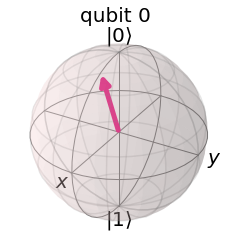

In [10]:
qc2_prep = QuantumCircuit(1, 1) # Initialize circuit with one qubit
qc2_prep.ry(np.pi/8, 0) # Prepare quantum state

draw_bloch(qc2_prep) # Visualize on Bloch sphere

In [11]:
qc2 = QuantumCircuit(1, 1) # Initialize circuit with one qubit
qc2 += qc2_prep # Prepare quantum state
# Write the rest of the quantum circuit here:
# X-basis measurement
# YOUR CODE HERE
qc2.h(0)
qc2.measure(0, 0)

qc2.draw(fold=-1) # Visualize quantum circuit

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  


┌─────────┐┌───┐┌─┐
  q: ┤ Ry(π/8) ├┤ H ├┤M├
     └─────────┘└───┘└╥┘
c: 1/═════════════════╩═
                      0

In [15]:
job2 = execute(qc2, backend, shots=1000) # Simulate
job2.result().get_counts(qc2)

{'0': 686, '1': 314}

In [16]:
# Validate and test your circuit `qc2`
_qc2_prep = QuantumCircuit(1, 1)
_qc2_prep.ry(np.pi/8, 0)
assert qc2_prep[:] == _qc2_prep[:], 'Do not modify the state preparation part'
assert qc2[:len(_qc2_prep)] == _qc2_prep[:], 'Do not modify the state preparation part'

_meas = QuantumCircuit(1, 1)
_meas.measure(0, 0)
assert qc2[-1:] == _meas[:], 'Your circuit must end with a measurement'

# Hidden tests

##### 1.1.4 X-basis measurement (continued)
What is the probability `pz` of obtaining $|+\rangle$ from the measurement?

In [18]:
px = (
    # YOUR CODE HERE
    0.6913
)
print(px)

0.6913


In [19]:
# The autograder will test the value stored in `px`
assert 0 <= px <= 1, 'The probability should be between 0 and 1'

##### 1.1.5 X-basis measurement (continued)
What is the expectation value of the above measurement, $\langle X\rangle$?

In [20]:
X = (
    # YOUR CODE HERE
     px*1 + (1 - px)*(-1)
)
print(X)

0.38260000000000005


In [21]:
# The autograder will test the value stored in `X`
assert float(X) == X, 'The value should be a real number'

#### 1.2 Measuring multi-qubit states
Consider the following quantum program that prepares the quantum state $|\psi\rangle=\frac{1}{\sqrt{3}}(|01\rangle+|10\rangle+|11\rangle)$.

In [22]:
qc3_prep = QuantumCircuit(2, 1) # Initialize circuit with two qubits
# Prepare quantum state
qc3_prep.ry(np.arccos(1/3**0.5)*2, 0)
qc3_prep.cry(np.pi/2, 0, 1)
qc3_prep.x(1)

qc3_prep.draw(fold=-1)

┌────────────┐                
q_0: ┤ Ry(1.9106) ├─────■──────────
     └────────────┘┌────┴────┐┌───┐
q_1: ──────────────┤ Ry(π/2) ├┤ X ├
                   └─────────┘└───┘
c: 1/══════════════════════════════

In [23]:
# Compute the state psi
state_simulator = BasicAer.get_backend('statevector_simulator')
result = execute(qc3_prep, state_simulator).result()
psi = result.get_statevector(qc3_prep)
print(f'psi = {psi.round(10)!r}')

psi = array([0.        +0.j, 0.57735027+0.j, 0.57735027+0.j, 0.57735027+0.j])


In [27]:
# Scratch space (you may also add new cells anywhere in this notebook if needed)

# You may copy code from earlier in this notebook and run it on qc3_prep

(4,)

##### 1.2.1 Partial measurement
Say we want to measure observable $I\otimes X$.  What is the probability of measuring $|+\rangle$ on the second qubit?  You may calculate $p_{IX}$ by hand or compute it using the variable `psi` calculated above.

In [28]:
# YOUR CODE HERE

id_tensor_plus = np.array([[0.5, 0.5, 0, 0],[0.5, 0.5, 0, 0],[0, 0, 0.5, 0.5],[0, 0, 0.5, 0.5]])

pix = (
    # YOUR CODE HERE
    np.matmul(psi.reshape(4, 1).T, np.matmul(id_tensor_plus, psi.reshape(4, 1)))[0][0].real
)
print(pix)

0.8333333333333333


In [29]:
# The autograder will test the value stored in `pix`
assert 0 <= pix <= 1, 'The probability should be between 0 and 1'

##### 1.2.2 Partial measurement (continued)
What is the post-measurement state for the first qubit? Write down the density matrix representation of the quantum state. For example, if your answer is $\rho = \begin{pmatrix}1/2 & 0\\ 0 & 1/2\end{pmatrix}$, enter
```python
rho = np.array([[1/2, 0],
                [0, 1/2]])
```
You may calculate $\rho$ by hand or compute it using the variable `psi` calculated earlier.

In [ ]:
rho = ...
# YOUR CODE HERE

rho = np.array([[1/3, 1/3],[1/3, 2/3]])

print(rho)

In [ ]:
# The autograder will test the value stored in `rho`
assert rho.shape == (2, 2), 'rho must be a 2 by 2 numpy array'
assert np.isclose(np.trace(rho), 1), 'Invalid density matrix: the trace must equal 1'

#### 1.3 A sequence of projective measurements

Consider the following quantum program that prepares the boring quantum state $|\psi\rangle=|00\rangle$.  We will look at the result of making projective measurements on this state.

In [ ]:
qc4_prep = QuantumCircuit(2) # Initialize circuit with two qubits
# Prepare quantum state
# No gates

qc4_prep.draw(fold=-1)

In [ ]:
# Compute the state psi
state_simulator = BasicAer.get_backend('statevector_simulator')
result = execute(qc4_prep, state_simulator).result()
psi4 = result.get_statevector(qc4_prep)
print(f'psi = {psi4.round(10)!r}')

In [ ]:
# The observable X⊕X
o1_circ = QuantumCircuit(2)
o1_circ.x(0)
o1_circ.x(1)

o1_circ.draw(fold=-1)

In [ ]:
# The observable Z⊕Z
o2_circ = QuantumCircuit(2)
o2_circ.z(0)
o2_circ.z(1)

o2_circ.draw(fold=-1)

In [ ]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(1, 'c')
qc4 = QuantumCircuit(q, c) # Initialize circuit with two qubits

# Prepare the initial state (qubits 1 and 2)
qc4.append(qc4_prep.to_gate(label='prep'), [1, 2])
qc4.barrier()

# Measure observable 1
qc4.h(0)
qc4.append(o1_circ.to_gate(label='O1').control(), [0, 1, 2])
qc4.h(0)
qc4.measure(0, c)
qc4.barrier()

qc4.x(0, label='reset').c_if(c, 1)  # Reset the measurement qubit to 0
qc4.z(2).c_if(c, 1)
qc4.barrier()

# Measure observable 2
qc4.h(0)
qc4.append(o2_circ.to_gate(label='O2').control(), [0, 1, 2])
qc4.h(0)
qc4.measure(0, c)
qc4.barrier()

qc4.x(0, label='reset').c_if(c, 1)  # Reset the measurement qubit to 0

qc4.draw(fold=-1)

In [ ]:
# Scratch space (you may also add new cells anywhere in this notebook if needed)

# You may copy code from earlier in this notebook and run it

##### 1.3.1 Projective measurement
What is the state vector `psi_after_o1_0` (for qubits 1 and 2) after measureing $O_1$, the observable $X\otimes X$ (at the 2nd barrier)?  Assume the outcome of the measurement is 0.

For example, if your answer is $\psi = \begin{pmatrix}1/2 \\ 1/2 \\ 1/2 \\ -1/2\end{pmatrix}$, enter
```python
psi_after_o1_0 = np.array([1, 1, 1, -1]) / 2
```

In [ ]:
psi_after_o1_0 = ...
# YOUR CODE HERE

psi_after_o1_0 = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

print(psi_after_o1_0)

In [ ]:
# The autograder will test the value stored in `psi_after_o1_0`
assert psi_after_o1_0.shape == (4,), (
    'psi_after_o1_0 must be a 1D numpy array with 4 entries')
assert np.isclose(np.linalg.norm(psi_after_o1_0), 1), (
    'The state vector must be normalized')

##### 1.3.2 Projective measurement (continued)
What is the state vector `psi_after_o1_1` (for qubits 1 and 2) after measureing $O_1$, the observable $X\otimes X$ (at the 2nd barrier)?  **Assume the outcome of the measurement is 1.**

In [ ]:
psi_after_o1_1 = ...
# YOUR CODE HERE
psi_after_o1_1 = np.array([1/np.sqrt(2), 0, 0, -1/np.sqrt(2)])

print(psi_after_o1_1)

In [ ]:
# The autograder will test the value stored in `psi_after_o1_1`
assert psi_after_o1_1.shape == (4,), (
    'psi_after_o1_1 must be a 1D numpy array with 4 entries')
assert np.isclose(np.linalg.norm(psi_after_o1_1), 1), (
    'The state vector must be normalized')

##### 1.3.3 Projective measurement 2
What is the state vector $\psi_1$ (for qubits 1 and 2) after measureing $O_2$, the observable $Z\otimes Z$ (at the 4th barrier)?

In [ ]:
psi_after_o2 = ...
# YOUR CODE HERE

psi_after_o2 = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

print(psi_after_o2)

In [ ]:
# The autograder will test the value stored in `psi_after_o2`
assert psi_after_o2.shape == (4,), (
    'psi_after_o2 must be a 1D numpy array with 4 entries')
assert np.isclose(np.linalg.norm(psi_after_o2), 1), (
    'The state vector must be normalized')